Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9317 - loss: 0.2249 - val_accuracy: 0.9682 - val_loss: 0.1076
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9705 - loss: 0.0990 - val_accuracy: 0.9743 - val_loss: 0.0883
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9797 - loss: 0.0678 - val_accuracy: 0.9738 - val_loss: 0.0902
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9842 - loss: 0.0546 - val_accuracy: 0.9742 - val_loss: 0.0904
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9874 - loss: 0.0420 - val_accuracy: 0.9778 - val_loss: 0.0843
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9892 - loss: 0.0365 - val_accuracy: 0.9737 - val_loss: 0.1053
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9787 - val_loss: 0.0829
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9916 - loss: 0.0287 - 

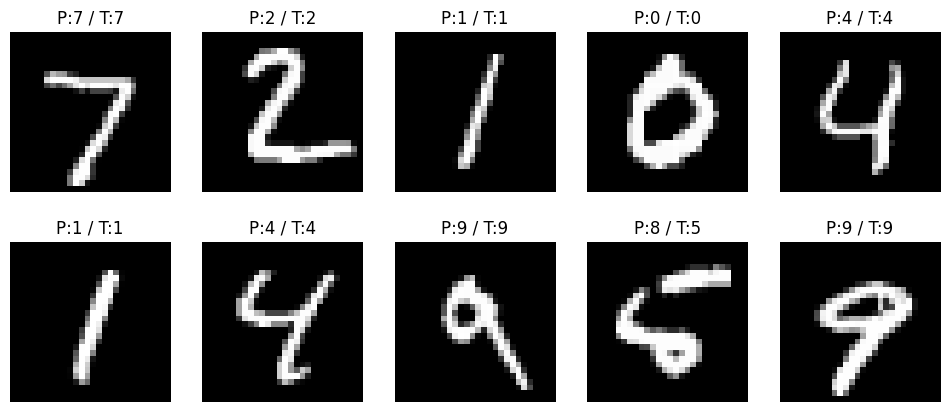

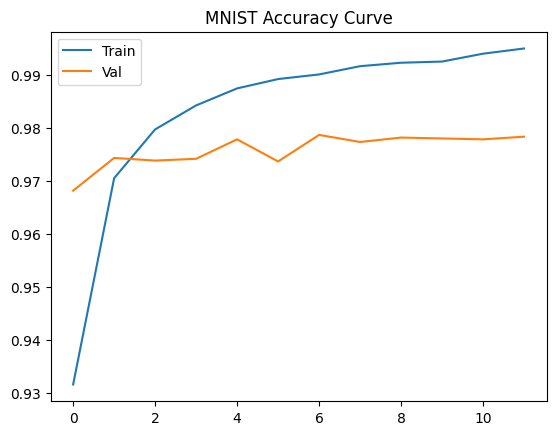

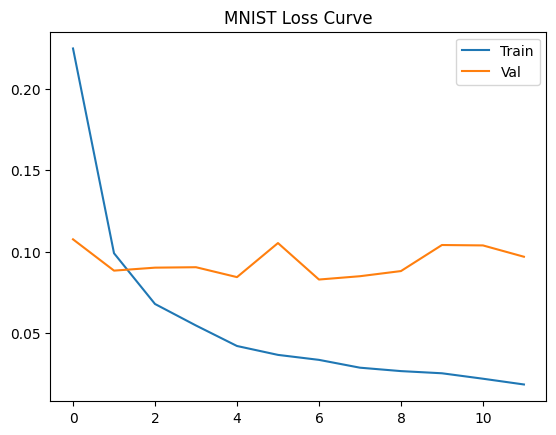

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# Load Data
# ======================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

# ======================
# Build Deep FCFNN
# ======================
inputs = Input((784,))
x = Dense(1024, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ======================
# Evaluate
# ======================
loss, acc = model.evaluate(x_test_flat, y_test)
print("MNIST Test Accuracy:", acc)

# ======================
# Predict + Show Images
# ======================
pred = model.predict(x_test_flat)
pred_classes = np.argmax(pred, axis=1)

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P:{pred_classes[i]} / T:{y_test[i]}")
    plt.axis('off')
plt.show()

# Accuracy Curve
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("MNIST Accuracy Curve")
plt.legend()
plt.show()

# Loss Curve
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("MNIST Loss Curve")
plt.legend()
plt.show()

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8240 - loss: 0.4892 - val_accuracy: 0.8457 - val_loss: 0.4201
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8653 - loss: 0.3624 - val_accuracy: 0.8678 - val_loss: 0.3703
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8810 - loss: 0.3229 - val_accuracy: 0.8692 - val_loss: 0.3461
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8879 - loss: 0.2984 - val_accuracy: 0.8818 - val_loss: 0.3419
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8946 - loss: 0.2845 - val_accuracy: 0.8803 - val_loss: 0.3422
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8986 - loss: 0.2694 - val_accuracy: 0.8755 - val_loss: 0.3412
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9043 - loss: 0.2529 - val_accuracy: 0.8785 - val_loss: 0.3426
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9094 - loss: 0.2407 - val_a

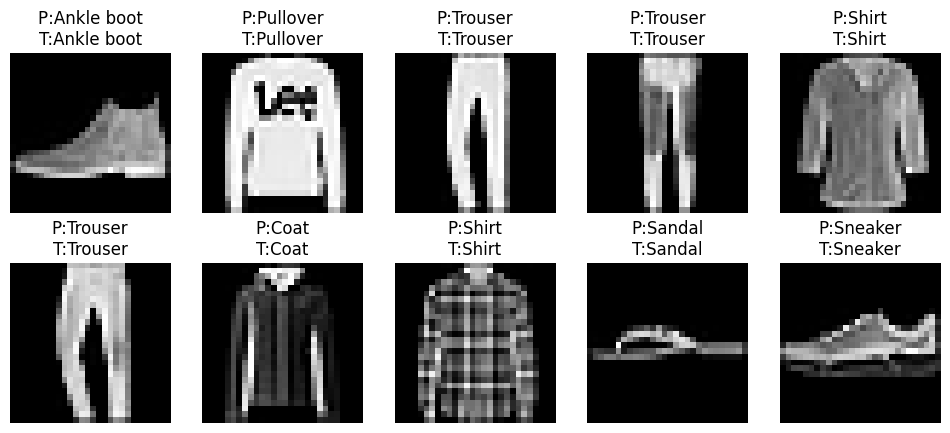

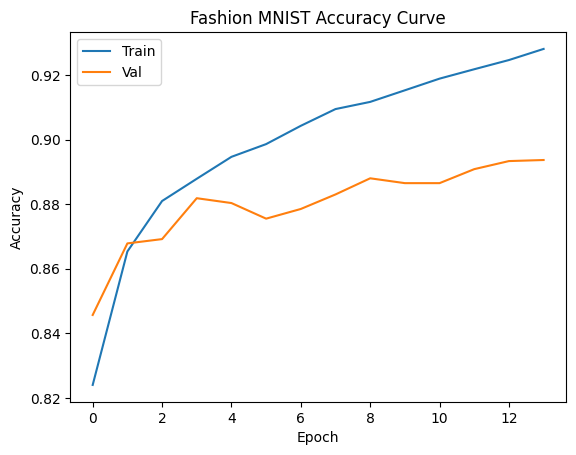

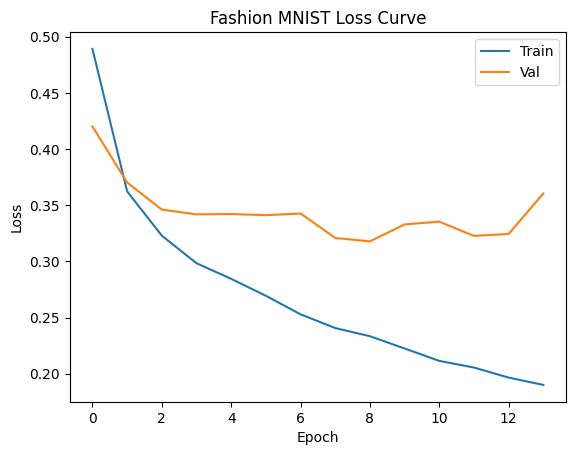

In [5]:
# ========================
# 🧵 Fashion MNIST FCFNN Full Code
# ========================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ========================
# 1️⃣ Load Dataset
# ========================
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 images → 784
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# ========================
# 2️⃣ Build FCFNN (Functional API)
# ========================
inputs = Input(shape=(784,), name="input_layer")

x = Dense(512, activation='relu', name="hidden1")(inputs)
x = Dense(256, activation='relu', name="hidden2")(x)
x = Dense(128, activation='relu', name="hidden3")(x)

outputs = Dense(10, activation='softmax', name="output")(x)

model = Model(inputs=inputs, outputs=outputs, name="fashion_fcnn")

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ========================
# 3️⃣ Train Model with EarlyStopping
# ========================
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ========================
# 4️⃣ Evaluate
# ========================
loss, acc = model.evaluate(x_test_flat, y_test)
print("Fashion MNIST Test Accuracy:", acc)

# ========================
# 5️⃣ Predictions & Plot
# ========================
pred_classes = np.argmax(model.predict(x_test_flat[:10]), axis=1)

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P:{label_names[pred_classes[i]]}\nT:{label_names[y_test[i]]}")
    plt.axis('off')
plt.show()

# ========================
# 6️⃣ Plot Accuracy & Loss Curves
# ========================
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Fashion MNIST Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Fashion MNIST Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ========================
# Load CIFAR-10
# ========================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten labels safely
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train_flat = x_train.reshape(-1, 32*32*3)
x_test_flat = x_test.reshape(-1, 32*32*3)

# ========================
# Build FCFNN
# ========================
inputs = Input(shape=(3072,))
x = Dense(1024, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ========================
# Train with EarlyStopping
# ========================
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x_train_flat, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# ========================
# Evaluate
# ========================
loss, acc = model.evaluate(x_test_flat, y_test)
print("CIFAR-10 Test Accuracy:", acc)

# ========================
# Predictions & Plot
# ========================
pred_classes = np.argmax(model.predict(x_test_flat[:10]), axis=1)

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"P:{pred_classes[i]} / T:{y_test[i]}")
    plt.axis('off')
plt.show()

# Accuracy & Loss curves
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("CIFAR Accuracy Curve")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("CIFAR Loss Curve")
plt.legend()
plt.show()

 11706368/170498071 ━━━━━━━━━━━━━━━━━━━━ 22:48 9us/step

KeyboardInterrupt: 